<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<AxesSubplot:>

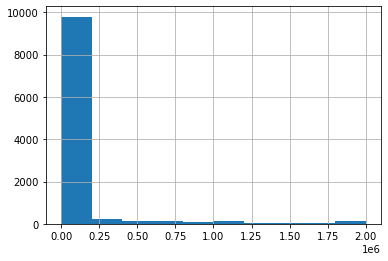

In [6]:
df = pd.read_csv(r"C:\Users\KyThuat88\Downloads\m1_survey_data.csv")

df["ConvertedComp"].hist()

### Box Plots


Plot a box plot of `Age.`


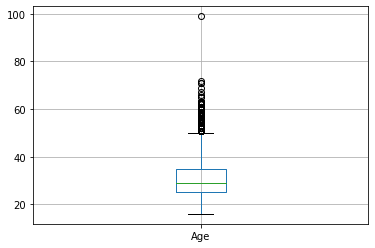

In [9]:
import matplotlib.pyplot as plt
import numpy as np

boxplot = df.boxplot(column=['Age'])

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

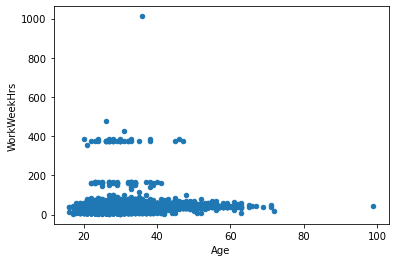

In [10]:
df.plot.scatter(x='Age', y='WorkWeekHrs')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


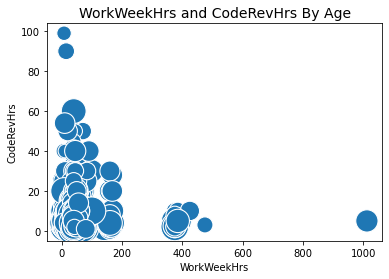

In [22]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns

# use the scatterplot function to build the bubble map
sns.scatterplot(data=df, x="WorkWeekHrs", y="CodeRevHrs", size="Age", legend=False, sizes=(20, 2000))
plt.title('WorkWeekHrs and CodeRevHrs By Age', size=14) 
plt.xlabel('WorkWeekHrs', size=10) 
plt.ylabel('CodeRevHrs', size=10)

# show the graph

plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [14]:
df1 = df["DatabaseDesireNextYear"].value_counts().nlargest(5)
df1

Microsoft SQL Server    548
PostgreSQL              543
MongoDB                 299
MySQL                   257
PostgreSQL;Redis        212
Name: DatabaseDesireNextYear, dtype: int64

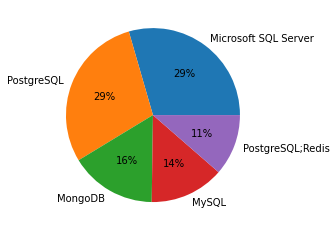

In [17]:
mylabels = ["Microsoft SQL Server","PostgreSQL","MongoDB","MySQL","PostgreSQL;Redis"]
plt.pie(df1,labels = mylabels,autopct='%1.0f%%')
plt.show() 

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


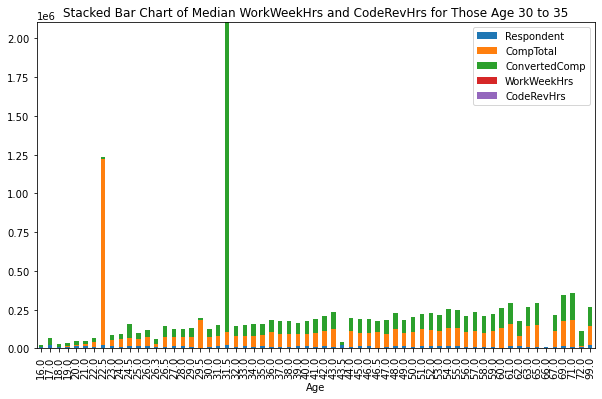

In [23]:
df1 = df.groupby('Age').median()

df1.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.title('Stacked Bar Chart of Median WorkWeekHrs and CodeRevHrs for Those Age 30 to 35')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


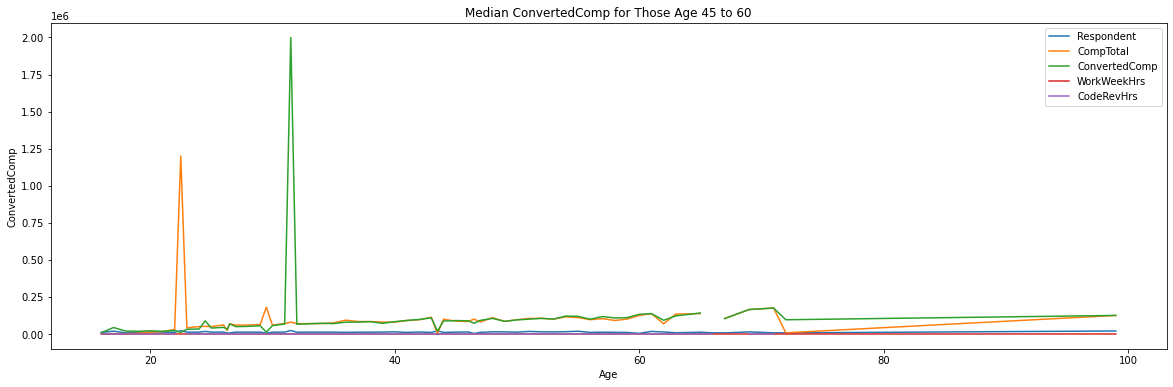

In [24]:
df1 = df.groupby('Age').median()

df1.plot(kind='line', figsize=(20, 6))

plt.title('Median ConvertedComp for Those Age 45 to 60')
plt.ylabel('ConvertedComp')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [ ]:
ax = df.plot.barh(y='MainBranch')

Close the database connection.


In [ ]:
conn.close()

## Authors


Thi Hien Dao

## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |
| 2022-09-27        | 0.2     | Thi Hien Dao      | Completed the codes                |

Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
